In [37]:
import os
import glob

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [51]:
#x20 = glob.glob("../../../Dataset/images_for_preview/images_for_preview/20x images/input/*")
#y20 = glob.glob("../../../Dataset/images_for_preview/images_for_preview/20x images/targets/*")
#x40 = glob.glob("../../../Dataset/images_for_preview/images_for_preview/40x images/input/*")
#y40 = glob.glob("../../../Dataset/images_for_preview/images_for_preview/40x images/targets/*")
#x60 = glob.glob("../../../Dataset/images_for_preview/images_for_preview/60x images/input/*")
#y60 = glob.glob("../../../Dataset/images_for_preview/images_for_preview/60x images/targets/*")

x = glob.glob("../../../Dataset/images_for_preview/images_for_preview/*/input/*")
y = glob.glob("../../../Dataset/images_for_preview/images_for_preview/*/targets/*")

In [76]:
def get_image_metadata(path_to_file):
    """
    B02   - well (row B, column 02) 
    T0001 - timepoint (irrelevant for this dataset) 
    F001  - field of view = site 
    L01   - timeline (irrelevant for this datset) 
    A01   - action list number (3 fluorescent + 1 brightfield action) 
    Z01   - 3D z-number (slice number or vertical position) 
    C01   - imaging channel (1 nuclear, 2 lipids, 3 cytoplasm, 4 brightfield)
    """
    string_arr = os.path.basename(path_to_file).split("_")
    row_col = string_arr[-2] # Row and column
    timepoint = string_arr[-1][:5]
    fied_of_view = string_arr[-1][5:9]
    timeline = string_arr[-1][9:12]
    action_list_number = string_arr[-1][12:15]
    z_number_3d = string_arr[-1][15:18]
    imaging_channel = string_arr[-1][18:21]
    return {
        "row_col":       row_col,
        #"timepoint":     timepoint,  # apparently irrelevant
        "field of view": fied_of_view,
        #"timeline": timeline,  # apparently irrelevant
        "action_list_number": action_list_number,
        "z_number_3d": z_number_3d,
        "imaging_channel": imaging_channel
    }
    
#for x_sample in x:
#    sample_metadata = get_image_metadata(x_sample)
#    print(sample_metadata)
#    print(cv2.imread(x_sample).shape)
    
for y_sample in y:
    sample_metadata = get_image_metadata(y_sample)
    print(sample_metadata)
    print(cv2.imread(y_sample).shape)

{'row_col': 'D04', 'field of view': 'F006', 'action_list_number': 'A01', 'z_number_3d': 'Z01', 'imaging_channel': 'C01'}
(2154, 2554, 3)
{'row_col': 'D04', 'field of view': 'F006', 'action_list_number': 'A02', 'z_number_3d': 'Z01', 'imaging_channel': 'C02'}
(2154, 2554, 3)
{'row_col': 'D04', 'field of view': 'F006', 'action_list_number': 'A03', 'z_number_3d': 'Z01', 'imaging_channel': 'C03'}
(2154, 2554, 3)
{'row_col': 'D04', 'field of view': 'F008', 'action_list_number': 'A01', 'z_number_3d': 'Z01', 'imaging_channel': 'C01'}
(2156, 2556, 3)
{'row_col': 'D04', 'field of view': 'F008', 'action_list_number': 'A02', 'z_number_3d': 'Z01', 'imaging_channel': 'C02'}
(2156, 2556, 3)
{'row_col': 'D04', 'field of view': 'F008', 'action_list_number': 'A03', 'z_number_3d': 'Z01', 'imaging_channel': 'C03'}
(2156, 2556, 3)
{'row_col': 'D04', 'field of view': 'F012', 'action_list_number': 'A01', 'z_number_3d': 'Z01', 'imaging_channel': 'C01'}
(2156, 2556, 3)
{'row_col': 'D04', 'field of view': 'F012

{'row_col': 'D04', 'field of view': 'F006', 'action_list_number': 'A04', 'z_number_3d': 'Z01', 'imaging_channel': 'C04'}
{'row_col': 'D04', 'field of view': 'F006', 'action_list_number': 'A04', 'z_number_3d': 'Z02', 'imaging_channel': 'C04'}
{'row_col': 'D04', 'field of view': 'F006', 'action_list_number': 'A04', 'z_number_3d': 'Z03', 'imaging_channel': 'C04'}
{'row_col': 'D04', 'field of view': 'F006', 'action_list_number': 'A04', 'z_number_3d': 'Z04', 'imaging_channel': 'C04'}
{'row_col': 'D04', 'field of view': 'F006', 'action_list_number': 'A04', 'z_number_3d': 'Z05', 'imaging_channel': 'C04'}
{'row_col': 'D04', 'field of view': 'F006', 'action_list_number': 'A04', 'z_number_3d': 'Z06', 'imaging_channel': 'C04'}
{'row_col': 'D04', 'field of view': 'F006', 'action_list_number': 'A04', 'z_number_3d': 'Z07', 'imaging_channel': 'C04'}


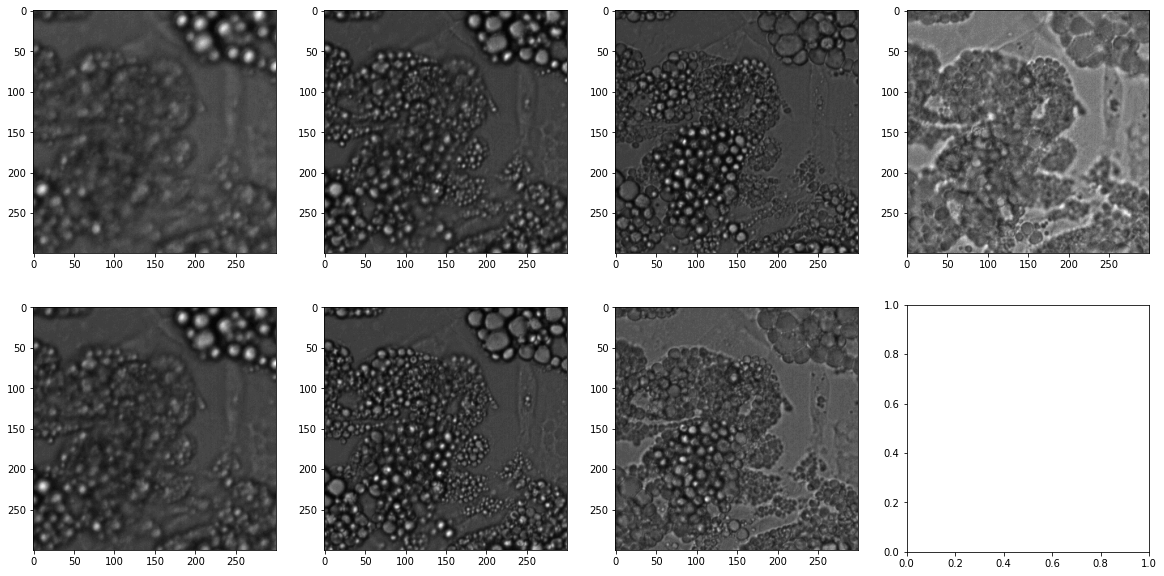

In [128]:
fig, ax = plt.subplots(2,4, figsize=(20,10))

for i, x_sample in enumerate(x[:7]):
    img = cv2.imread(x_sample)
    
    print(get_image_metadata(x_sample))
    plt_data = img[:300,:300]
    ax[i%2][i//2].imshow(plt_data/np.max(plt_data))
    
plt.show()

(2154, 2554, 3)
(2154, 2554, 3)
(2154, 2554, 3)


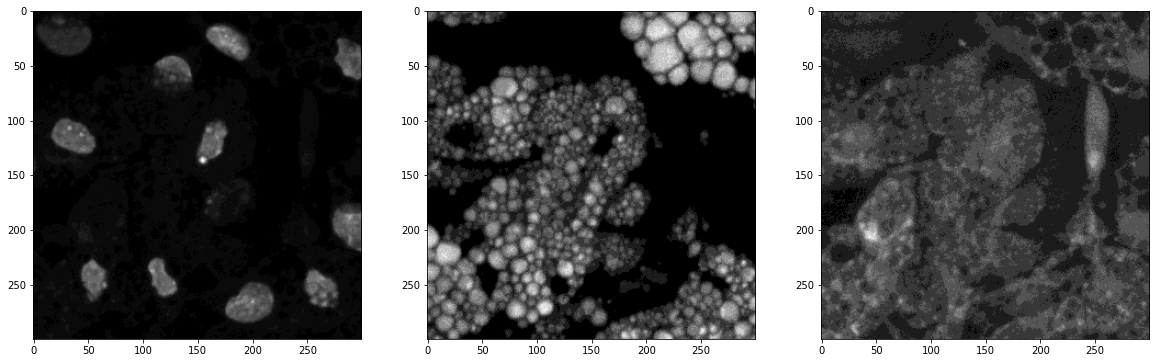

In [121]:
fig, ax = plt.subplots(1,3, figsize=(20,15))

for i, y_sample in enumerate(y[:3]):
    img = cv2.imread(y_sample)
    
    print(get_image_metadata(y_sample))
    plt_data = img[:300,:300]
    ax[i].imshow(plt_data/np.max(plt_data))

plt.show()

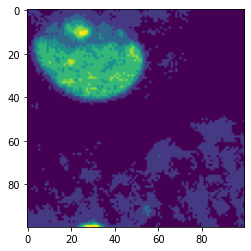

In [99]:
plt.figure(figsize=(20,15))

for i, y_sample in enumerate(y[:3]):
    img = cv2.imread(y_sample)
    
    print(get_image_metadata(y_sample))
    plt_data = img[:300,:300]
    ax[i].imshow(plt_data/np.max(plt_data))

plt.show()

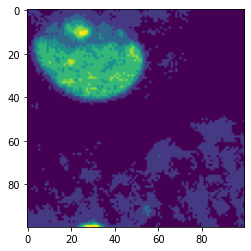

In [100]:
img = cv2.imread(y[0])

plt.figure()
plt_data = img[:100,:100,2]
plt.imshow(plt_data/np.max(plt_data))
plt.show()

In [83]:
print(os.path.basename(x[0]), "\n", os.path.basename(y[0]))

AssayPlate_Greiner_#655090_D04_T0001F006L01A04Z01C04.tif 
 AssayPlate_Greiner_#655090_D04_T0001F006L01A01Z01C01.tif


In [96]:
[os.path.basename(i).replace("T0001","").replace("L01","") for i in x]

['AssayPlate_Greiner_#655090_D04_F006A04Z01C04.tif',
 'AssayPlate_Greiner_#655090_D04_F006A04Z02C04.tif',
 'AssayPlate_Greiner_#655090_D04_F006A04Z03C04.tif',
 'AssayPlate_Greiner_#655090_D04_F006A04Z04C04.tif',
 'AssayPlate_Greiner_#655090_D04_F006A04Z05C04.tif',
 'AssayPlate_Greiner_#655090_D04_F006A04Z06C04.tif',
 'AssayPlate_Greiner_#655090_D04_F006A04Z07C04.tif',
 'AssayPlate_Greiner_#655090_D04_F008A04Z01C04.tif',
 'AssayPlate_Greiner_#655090_D04_F008A04Z02C04.tif',
 'AssayPlate_Greiner_#655090_D04_F008A04Z03C04.tif',
 'AssayPlate_Greiner_#655090_D04_F008A04Z04C04.tif',
 'AssayPlate_Greiner_#655090_D04_F008A04Z05C04.tif',
 'AssayPlate_Greiner_#655090_D04_F008A04Z06C04.tif',
 'AssayPlate_Greiner_#655090_D04_F008A04Z07C04.tif',
 'AssayPlate_Greiner_#655090_D04_F012A04Z01C04.tif',
 'AssayPlate_Greiner_#655090_D04_F012A04Z02C04.tif',
 'AssayPlate_Greiner_#655090_D04_F012A04Z03C04.tif',
 'AssayPlate_Greiner_#655090_D04_F012A04Z04C04.tif',
 'AssayPlate_Greiner_#655090_D04_F012A04Z05C04

In [97]:
[os.path.basename(i).replace("T0001","").replace("L01","") for i in y]

['AssayPlate_Greiner_#655090_D04_F006A01Z01C01.tif',
 'AssayPlate_Greiner_#655090_D04_F006A02Z01C02.tif',
 'AssayPlate_Greiner_#655090_D04_F006A03Z01C03.tif',
 'AssayPlate_Greiner_#655090_D04_F008A01Z01C01.tif',
 'AssayPlate_Greiner_#655090_D04_F008A02Z01C02.tif',
 'AssayPlate_Greiner_#655090_D04_F008A03Z01C03.tif',
 'AssayPlate_Greiner_#655090_D04_F012A01Z01C01.tif',
 'AssayPlate_Greiner_#655090_D04_F012A02Z01C02.tif',
 'AssayPlate_Greiner_#655090_D04_F012A03Z01C03.tif']

In [91]:
set([os.path.basename(i) for i in x]).intersection(set([os.path.basename(i) for i in y]))

set()

In [133]:
(img[:,:,0] - img[:,:,2]).sum()



0